In [36]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [37]:
img = cv2.imread('car.jpg')

In [38]:
img.shape

(168, 300, 3)

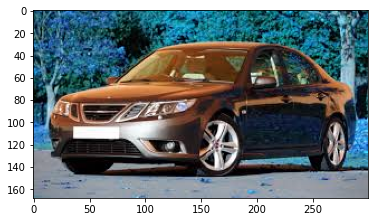

In [39]:
plt.imshow(img)

# Calcul Manuel de l'histogramme
dans cette partie, nous réalisons un code de calcul manuel de l'histogramme avec des boucles imbriquées

In [5]:
histogram=np.zeros((3, 256))
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        for k in range(img.shape[2]):
            lineIndex=img[i,j,k]
            histogram[k,lineIndex]=histogram[k,lineIndex]+1

Affichage de l'histogramme

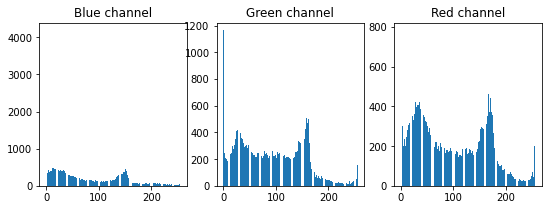

In [6]:
pixels = list(range(256))
values1_1 = histogram[0,:]
values2_1 = histogram[1,:]
values3_1 = histogram[2,:]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(pixels, values1_1)
plt.title('Blue channel')
plt.subplot(132)
plt.bar(pixels, values2_1)
plt.title('Green channel')
plt.subplot(133)
plt.bar(pixels, values3_1)
plt.title('Red channel')
plt.show()

# Calcul de l'histogramme en utilisant opencv

dans cette partie, nous faisons appel à opencv pour le calcul de l'histogramme 

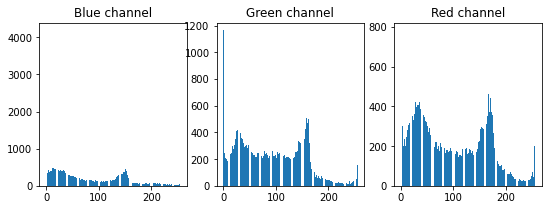

In [7]:
pixels = list(range(256))
hist = cv2.calcHist([img[:,:,0]],[0],None,[256],[0,256])
values1_2 = hist[:,0]
hist = cv2.calcHist([img[:,:,1]],[0],None,[256],[0,256])
values2_2 = hist[:,0]
hist = cv2.calcHist([img[:,:,2]],[0],None,[256],[0,256])
values3_2 = hist[:,0]

plt.figure(figsize=(9, 3))


plt.subplot(131)
plt.bar(pixels, values1_2)
plt.title('Blue channel')
plt.subplot(132)
plt.bar(pixels, values2_2)
plt.title('Green channel')
plt.subplot(133)
plt.bar(pixels, values3_2)
plt.title('Red channel')
plt.show()

# Comparaisons entre les deux histogrammes (manuel et en utilisant opencv)

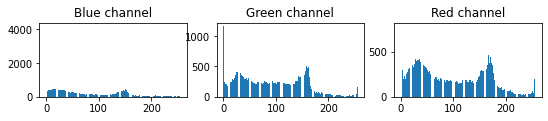

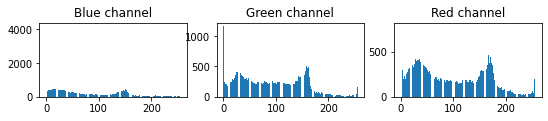

In [8]:
plt.figure(figsize=(9, 3))

plt.subplot(231)
plt.bar(pixels, values1_1)
plt.title('Blue channel')
plt.subplot(232)
plt.bar(pixels, values2_1)
plt.title('Green channel')
plt.subplot(233)
plt.bar(pixels, values3_1)
plt.title('Red channel')
plt.figure(figsize=(9, 3))
plt.subplot(234)
plt.bar(pixels, values1_2)
plt.title('Blue channel')
plt.subplot(235)
plt.bar(pixels, values2_2)
plt.title('Green channel')
plt.subplot(236)
plt.bar(pixels, values3_2)
plt.title('Red channel')
plt.show()

# Affichage de l'histogramme en utilisant la fonction plt.hist

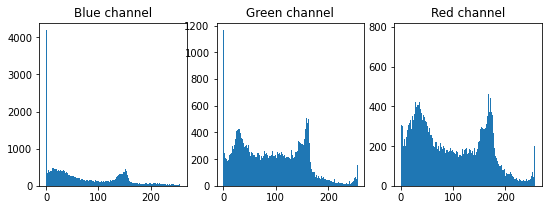

In [9]:
plt.figure(figsize=(9, 3))
plt.subplot(131)
plt.hist(img[:,:,0].ravel(),256,[0,256]); 
plt.title('Blue channel')
plt.subplot(132)
plt.hist(img[:,:,1].ravel(),256,[0,256]); 
plt.title('Green channel')
plt.subplot(133)
plt.hist(img[:,:,2].ravel(),256,[0,256]); 
plt.title('Red channel')
plt.show()

# Explorer d'autres fonctions de calcul

In [10]:
hist,bins = np.histogram(img.ravel(),256,[0,256])


In [11]:
hist = cv2.calcHist([img[:,:,0]],[0],None,[256],[0,256])


# Difference entre le output de la methode manuelle et la methode d'opencv

In [12]:
hist[0:10]

array([[4186.],
       [ 273.],
       [ 345.],
       [ 329.],
       [ 419.],
       [ 420.],
       [ 381.],
       [ 478.],
       [ 399.],
       [ 435.]], dtype=float32)

In [13]:
histogram[0,0:10]

array([4186.,  273.,  345.,  329.,  419.,  420.,  381.,  478.,  399.,
        435.])

# Histogramme cumulé
histogramm cumulé valeurs

In [14]:
histogramC=np.zeros((3, 256))
histogramC[0:2,1]=histogram[0:2,1]
for i in range(histogram.shape[0]):
    for j in range(histogram.shape[1]-1):
        histogramC[i,j+1]=histogram[i,j+1]+histogramC[i,j]
    

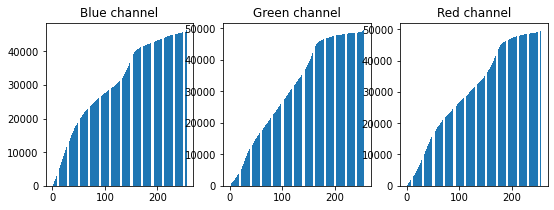

In [15]:
pixels = list(range(256))
values1_3 = histogramC[0,:]
values2_3 = histogramC[1,:]
values3_3 = histogramC[2,:]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(pixels, values1_3)
plt.title('Blue channel')
plt.subplot(132)
plt.bar(pixels, values2_3)
plt.title('Green channel')
plt.subplot(133)
plt.bar(pixels, values3_3)
plt.title('Red channel')
plt.show()

Histogramme cumulé pourcentage

In [18]:
histogramCP=np.zeros((3, 256))
for i in range(histogramC.shape[0]):
    maxHist=histogramC[i,histogramC.shape[1]-1]
for j in range(histogram.shape[1]):
    histogramCP[i,j]=histogramC[i,j]/maxHist*100

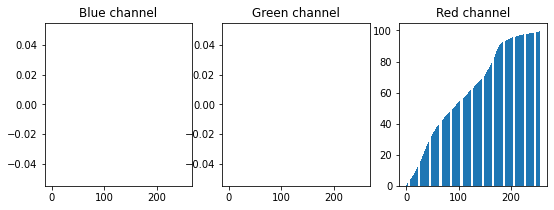

In [19]:
pixels = list(range(256))
values1_4 = histogramCP[0,:]
values2_4 = histogramCP[1,:]
values3_4 = histogramCP[2,:]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(pixels, values1_4)
plt.title('Blue channel')
plt.subplot(132)
plt.bar(pixels, values2_4)
plt.title('Green channel')
plt.subplot(133)
plt.bar(pixels, values3_4)
plt.title('Red channel')
plt.show()

# Egalisation d'histogramme


Utiliser le niveau de gris de l'image et assombrir d'abord l'image

In [20]:
img = cv2.imread('car.jpg')
grayOriginal= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        if gray[i,j]<50 or gray[i,j]>200:
        #if gray[i,j]==0 or gray[i,j]==255:
            gray[i,j]=127

Text(0.5, 1.0, 'Darker image')

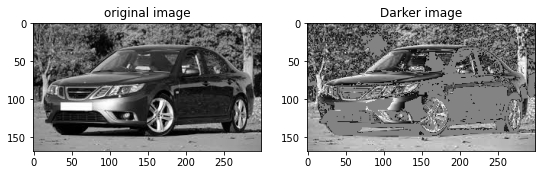

In [21]:
plt.figure(figsize=(9, 3))

plt.subplot(121)
plt.imshow(grayOriginal,cmap='gray')
plt.title('original image')
plt.subplot(122)
plt.imshow(gray,cmap='gray')
plt.title('Darker image')

Code permettant de normaliser l'image à une valeur maximale maxVal

# Normalisation d'une image avec une valeur arbitraire

In [111]:
img = cv2.imread('car.jpg')
grayOriginal= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

minPix=gray.min()
maxPix=gray.max()
print(gray.min(),gray.max())
maxVal=5
for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):    
        gray[i,j]=(maxVal/(maxPix-minPix)) *(gray[i,j]-minPix)
print(gray.min(),gray.max())

0 255
0 5


Text(0.5, 1.0, 'Darker image')

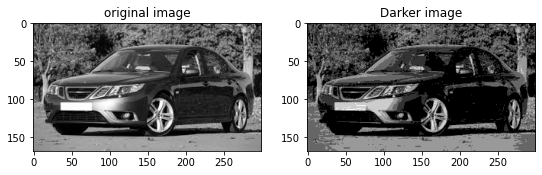

In [112]:
plt.figure(figsize=(9, 3))

plt.subplot(121)
plt.imshow(grayOriginal,cmap='gray')
plt.title('original image')
plt.subplot(122)
plt.imshow(gray,cmap='gray')
plt.title('Darker image')

In [113]:
histogramOriginal=np.zeros(256)

for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        lineIndex=grayOriginal[i,j]
        histogramOriginal[lineIndex]=histogramOriginal[lineIndex]+1

In [114]:
histogramG=np.zeros(256)

for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        lineIndex=gray[i,j]
        histogramG[lineIndex]=histogramG[lineIndex]+1

Text(0.5, 1.0, 'darker image histogram')

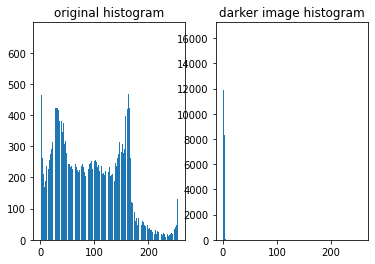

In [115]:
pixels = list(range(256))
plt.subplot(121)
plt.bar(pixels, histogramOriginal)
plt.title('original histogram')
plt.subplot(122)
plt.bar(pixels, histogramG)
plt.title('darker image histogram')

In [118]:
histogramC=np.zeros(256)

for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        lineIndex=gray[i,j]
        histogramC[lineIndex]=histogramC[lineIndex]+1
        
for i in range(histogramC.shape[0]-1):
    histogramC[i+1]=histogramC[i+1]+histogramC[i]

In [119]:
imageSize=gray.shape[0]*gray.shape[1]
histogramCE=np.zeros(256)
L=256
histogramCE =np.round(((histogramC - histogramC.min()) / (imageSize - histogramC.min())) *(L-1))

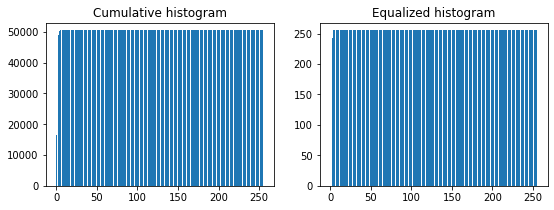

In [120]:
pixels = list(range(256))
values1_4 = histogramC
values2_4 = histogramCE

plt.figure(figsize=(9, 3))

plt.subplot(121)
plt.bar(pixels, values1_4)
plt.title('Cumulative histogram')
plt.subplot(122)
plt.bar(pixels, values2_4)
plt.title('Equalized histogram')

plt.show()

In [122]:
grayNew = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
for i in range(grayNew.shape[0]):
    for j in range(grayNew.shape[1]):
        grayNew[i,j]=histogramCE[gray[i,j]]
        

In [107]:
histogramNew=np.zeros(256)

for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        lineIndex=grayNew[i,j]
        histogramNew[lineIndex]=histogramNew[lineIndex]+1

Text(0.5, 1.0, 'equalized histogram')

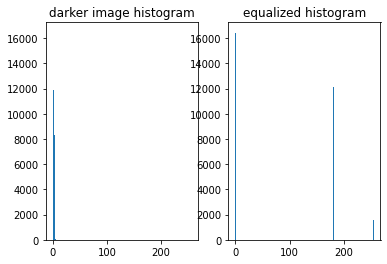

In [108]:
pixels = list(range(256))
plt.subplot(121)
plt.bar(pixels, histogramG)
plt.title('darker image histogram')
plt.subplot(122)
plt.bar(pixels, histogramNew)
plt.title('equalized histogram')

Text(0.5, 1.0, 'image qith equalized histogram')

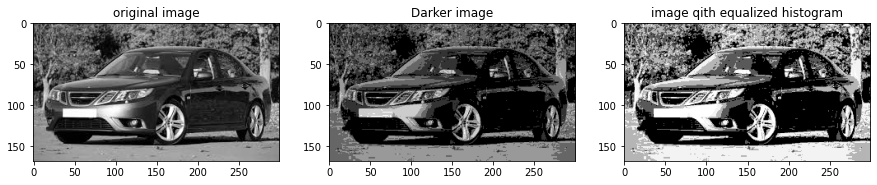

In [109]:
plt.figure(figsize=(15, 3))
plt.subplot(131)
plt.imshow(grayOriginal,cmap='gray')
plt.title('original image')
plt.subplot(132)
plt.imshow(gray,cmap='gray')
plt.title('Darker image')
plt.subplot(133)
plt.imshow(grayNew,cmap='gray')
plt.title('image qith equalized histogram')

Use equalisation of opencv

Text(0.5, 1.0, 'image with equalized histogram using openCv')

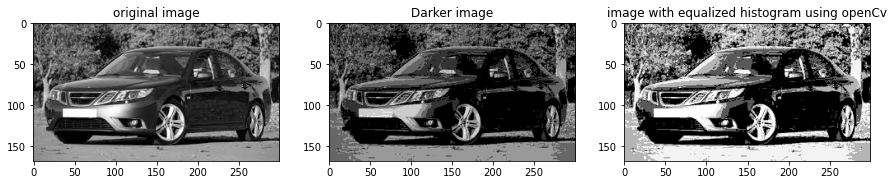

In [110]:
equ = cv2.equalizeHist(gray) 
plt.figure(figsize=(15, 3))
plt.subplot(131)
plt.imshow(grayOriginal,cmap='gray')
plt.title('original image')
plt.subplot(132)
plt.imshow(gray,cmap='gray')
plt.title('Darker image')
plt.subplot(133)
plt.imshow(equ,cmap='gray')
plt.title('image with equalized histogram using openCv')